<a href="https://colab.research.google.com/github/Soham-123-Prabhu/ChatGPT-impact-on-tech-job-market/blob/main/Illuminate_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/illuminate_ai_indeed_job.csv"

'/content/drive/My Drive/illuminate_ai_indeed_job.csv'


In [4]:
file_path = "/content/drive/My Drive/illuminate_ai_indeed_job.csv"

In [5]:
df = pd.read_csv(file_path)

<ipython-input-5-47c250c455f0>:1: DtypeWarning: Columns (0,11,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [6]:
df

,DownloadDate,Job Title,Job URL,Job Subtitle,Job Location,Company Name,Company URL,Company Rating,Company Review Count,Job Posted Date,Job Description,Job Type,Salary Estimate,Job Shift,Job Benefits,State
0,2023-07-02,Linux Systems Administrators (2 roles),https://www.indeed.com/viewjob?viewtype=embedd...,DKKD Staffing - United States,United States,DKKD Staffing,https://www.indeed.com/cmp/Dkkd-Staffing?campa...,NaN,NaN,2023-07-02,\n \n \n \n Video Player\n \n \n \...,NaN,$87.9K - $111K a year,NaN,NaN,NaN
1,2023-07-02,Senior Data Engineer - Remote,https://www.indeed.com/viewjob?viewtype=embedd...,"IPG Corporate - Atlanta, GA 30301","Atlanta, GA 30301",IPG Corporate,https://www.indeed.com/cmp/Oldcastle-Infrastru...,2.6,124.0,2023-07-02,\n\n Job ID: 482409\n Exempt\n \n Oldcastle ...,NaN,$101K - $128K a year,NaN,Dental insurance | Health insurance,GA
2,2023-07-02,Financial Data Analyst,https://www.indeed.com/viewjob?viewtype=embedd...,Mosaic (joinmosaic) - Remote,Remote,Mosaic (joinmosaic),NaN,NaN,NaN,2023-07-02,\n Who We Are \n We are creating the best way...,NaN,"$120,000 - $130,000 a year",NaN,401(k) | 401(k) matching | Dental insurance | ...,NaN
3,2023-07-02,Junior Cybersecurity Analyst,https://www.indeed.com/viewjob?viewtype=embedd...,"ITR Concession Co LLC - Elkhart, IN 46514","Elkhart, IN 46514",ITR Concession Co LLC,https://www.indeed.com/cmp/Itr-Concession-Co-L...,NaN,NaN,2023-07-01,\n\n Who we are: ITRCC is dedicated to deliver...,NaN,$45.8K - $58K a year,NaN,NaN,IN
4,2023-07-02,Systems Administrator,https://www.indeed.com/viewjob?viewtype=embedd...,"Hamilton Center, Inc. - Terre Haute, IN 47804","Terre Haute, IN 47804","Hamilton Center, Inc.","https://www.indeed.com/cmp/Hamilton-Center,-In...",2.7,103.0,2023-07-01,SYSTEMS ADMINISTRATOR\nPosition requires the i...,NaN,"$57,500 a year",8 hour shift,401(k) | 401(k) matching | Dental insurance | ...,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328649,03/01/2024,Software Test Engineering Intern,https://www.indeed.com/viewjob?viewtype=embedd...,"Panasonic Avionics Corporation - Irvine, CA 92612","Irvine, CA 92612",Panasonic Avionics Corporation,https://www.indeed.com/cmp/Panasonic-Avionics-...,3.5,362.0,04/01/2024,Software Test Engineering Summer Intern \n \n...,NaN,$25 - $36 an hour,NaN,NaN,CA
328650,03/01/2024,"Network Superintendent, Elementary and Seconda...",https://www.indeed.com/viewjob?viewtype=embedd...,"Saint Louis Public Schools - St. Louis, MO","St. Louis, MO",Saint Louis Public Schools,https://www.indeed.com/cmp/Saint-Louis-Public-...,3.4,75.0,09/01/2024,"Position Title: Network Superintendent, Elemen...",NaN,NaN,NaN,NaN,MO
328651,03/01/2024,Software Engineering Intern - Summer 2024,https://www.indeed.com/viewjob?viewtype=embedd...,"Intellisense Systems Inc - Torrance, CA 90501","Torrance, CA 90501",Intellisense Systems Inc,https://www.indeed.com/cmp/Intellisense-System...,3.5,10.0,04/01/2024,"Intellisense Systems, Inc. innovates what seem...",NaN,$19.45 an hour,NaN,Paid time off,CA
328652,03/01/2024,2024 Intern - Machine Learning Engineer/Resear...,https://www.indeed.com/viewjob?viewtype=embedd...,"Adobe - San Jose, CA 95110","San Jose, CA 95110",Adobe,https://www.indeed.com/cmp/Adobe?campaignid=mo...,4.3,800.0,04/01/2024,Our Company \n\n Changing the world through di...,NaN,$45 - $61 an hour,NaN,NaN,CA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328654 entries, 0 to 328653
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DownloadDate          132074 non-null  object 
 1   Job Title             328595 non-null  object 
 2   Job URL               328600 non-null  object 
 3   Job Subtitle          328595 non-null  object 
 4   Job Location          328600 non-null  object 
 5   Company Name          328566 non-null  object 
 6   Company URL           312861 non-null  object 
 7   Company Rating        245026 non-null  float64
 8   Company Review Count  245026 non-null  float64
 9   Job Posted Date       328595 non-null  object 
 10  Job Description       328595 non-null  object 
 11  Job Type              149733 non-null  object 
 12  Salary Estimate       120311 non-null  object 
 13  Job Shift             23978 non-null   object 
 14  Job Benefits          46296 non-null   object 
 15  

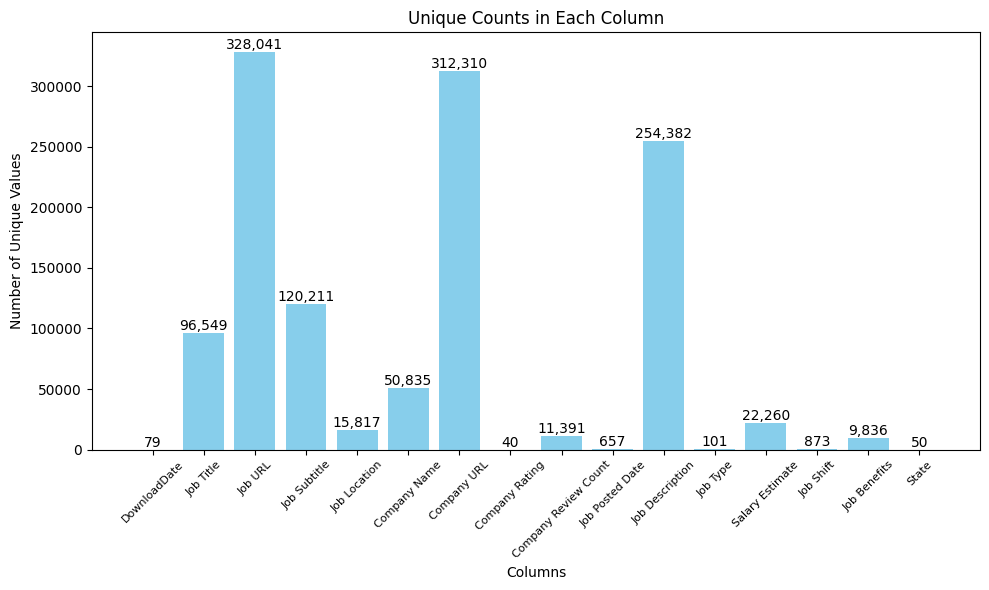

In [8]:
import matplotlib.pyplot as plt

# Count unique values in each column
unique_counts = df.nunique()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_counts.index, unique_counts.values, color='skyblue')

# Add count labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height()):,}', ha='center', va='bottom')

plt.title('Unique Counts in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()



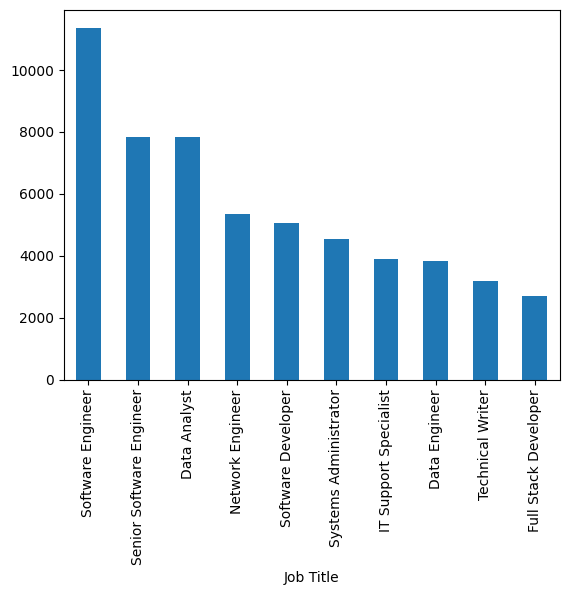

In [9]:
df['Job Title'].value_counts().head(10).plot.bar();

In [10]:
df['Job Title'].value_counts().sum()

328595

In [11]:
df['Job Posted Date']

0         2023-07-02
1         2023-07-02
2         2023-07-02
3         2023-07-01
4         2023-07-01
             ...    
328649    04/01/2024
328650    09/01/2024
328651    04/01/2024
328652    04/01/2024
328653    04/01/2024
Name: Job Posted Date, Length: 328654, dtype: object

In [12]:
#df['Job Posted Date'] = pd.to_datetime(df['Job Posted Date'])
def custom_date_parser(date):
    try:
        return pd.to_datetime(date, format='%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date, format='%d/%m/%Y')

# Assuming df is your DataFrame containing the 'Job Posted Date' column
df['Job Posted Date'] = df['Job Posted Date'].apply(custom_date_parser)

In [13]:
df['Job Posted Date']

0        2023-07-02
1        2023-07-02
2        2023-07-02
3        2023-07-01
4        2023-07-01
            ...    
328649   2024-01-04
328650   2024-01-09
328651   2024-01-04
328652   2024-01-04
328653   2024-01-04
Name: Job Posted Date, Length: 328654, dtype: datetime64[ns]

In [14]:
# Convert 'Job Posted Date' column to datetime format
df['Job Posted Date'] = pd.to_datetime(df['Job Posted Date'])

# Filter out rows where 'Job Posted Date' is not in 2024
df = df[df['Job Posted Date'].dt.year != 2024]


In [15]:
len(df['Job Title'].value_counts())

94765

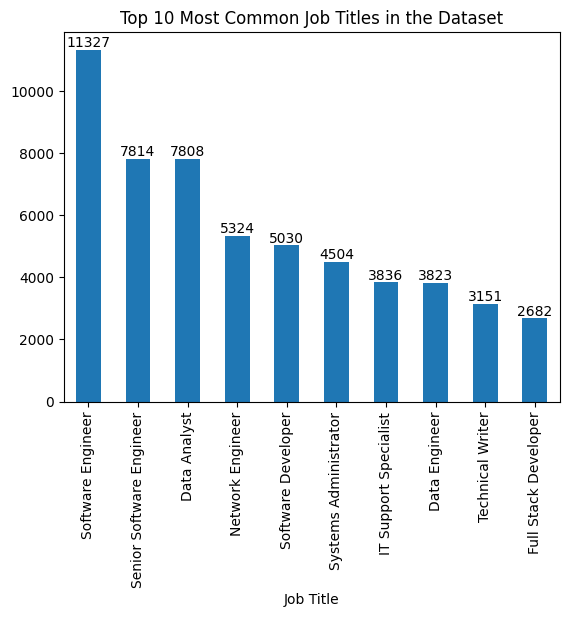

In [16]:
# Get the value counts of the top 10 job titles
top_job_titles = df['Job Title'].value_counts().head(10)

# Create the bar plot
top_job_titles_plot = top_job_titles.plot.bar()

# Add labels to the bars
for index, value in enumerate(top_job_titles):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.title('Top 10 Most Common Job Titles in the Dataset')
plt.show()


In [17]:
df['Job Title'].value_counts().sum()

324700

In [18]:
df['Job Posted Date']==2022

0         False
1         False
2         False
3         False
4         False
          ...  
328623    False
328631    False
328634    False
328640    False
328641    False
Name: Job Posted Date, Length: 324759, dtype: bool

In [19]:
num_jobs_2022 = len(df.loc[df['Job Posted Date'].dt.year == 2022])
print("Number of jobs posted in 2022:", num_jobs_2022)

Number of jobs posted in 2022: 239560


In [20]:
num_unique_jobs_2022 = df.loc[df['Job Posted Date'].dt.year == 2022, 'Job Title'].nunique()
print("Number of unique job postings in 2022:", num_unique_jobs_2022)


Number of unique job postings in 2022: 65235


In [21]:
# Calculate percentage of unique roles
percentage_unique_roles_2022 = (num_unique_jobs_2022 / num_jobs_2022) * 100

# Print the result
print("Percentage of unique job titles out of the total job postings in 2022: {:.2f}%".format(percentage_unique_roles_2022))


Percentage of unique job titles out of the total job postings in 2022: 27.23%


In [22]:
num_jobs_2023 = len(df.loc[df['Job Posted Date'].dt.year == 2023])
print("Number of jobs posted in 2023:", num_jobs_2023)

Number of jobs posted in 2023: 85140


In [23]:
num_unique_jobs_2023 = df.loc[df['Job Posted Date'].dt.year == 2023, 'Job Title'].nunique()
print("Number of unique job postings in 2023:", num_unique_jobs_2023)

Number of unique job postings in 2023: 34938


In [24]:
# Calculate percentage of unique roles
percentage_unique_roles_2023 = (num_unique_jobs_2023 / num_jobs_2023) * 100

# Print the result
print("Percentage of unique job titles out of the total job postings in 2023: {:.2f}%".format(percentage_unique_roles_2023))

Percentage of unique job titles out of the total job postings in 2023: 41.04%


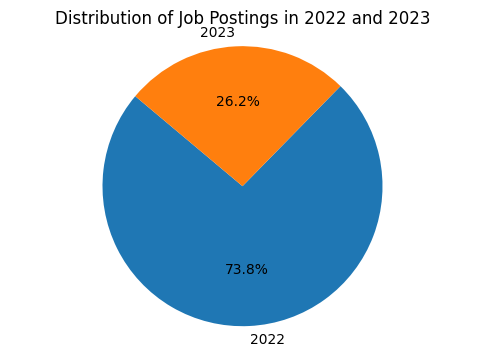

In [25]:
# Data for pie chart
labels = ['2022', '2023']
sizes = [num_jobs_2022, num_jobs_2023]

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Postings in 2022 and 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


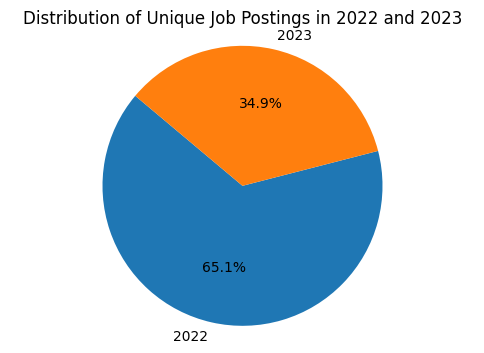

In [26]:
import matplotlib.pyplot as plt

# Data for pie chart
labels = ['2022', '2023']
sizes = [num_unique_jobs_2022, num_unique_jobs_2023]

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Job Postings in 2022 and 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

JOB POSTINGS FOR SE IN 2022

Add the total number of SE roles for all years


In [27]:
# Calculate the total number of job titles
total_job_titles = len(df['Job Title'])

# Count the number of job titles containing 'Software Engineer'
software_engineer_count = df['Job Title'].str.contains('Software Engineer', case=False).sum()

# Calculate the percentage
percentage_software_engineer = (software_engineer_count / total_job_titles) * 100

print(f"Percentage of Job Titles with 'Software Engineer': {percentage_software_engineer:.2f}%")



Percentage of Job Titles with 'Software Engineer': 34.57%


In [28]:
num_SE_jobs_2022 = len(df.loc[(df['Job Posted Date'].dt.year == 2022) & (df['Job Title']=='Software Engineer')])

In [29]:
print("Number of jobs posted for Software Engineers in 2022:", num_SE_jobs_2022)

Number of jobs posted for Software Engineers in 2022: 9201


JOB POSTINGS FOR SE IN 2023

In [30]:
num_SE_jobs_2023 = len(df.loc[(df['Job Posted Date'].dt.year == 2023) & (df['Job Title']=='Software Engineer')])

In [31]:
print("Number of jobs posted for Software Engineers in 2023:", num_SE_jobs_2023)

Number of jobs posted for Software Engineers in 2023: 2126


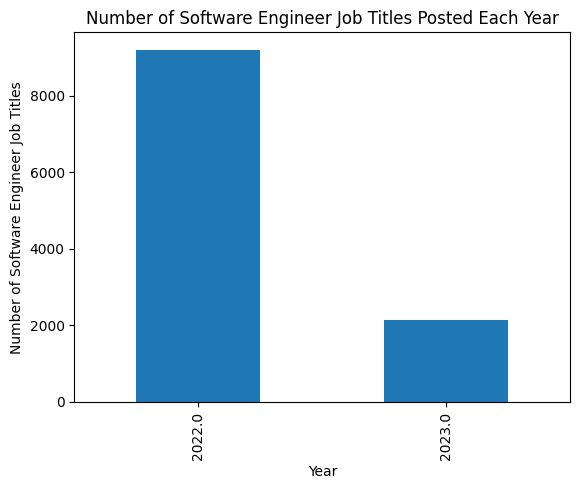

In [32]:
df[df['Job Title'] == 'Software Engineer'].groupby(df['Job Posted Date'].dt.year).size().plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of Software Engineer Job Titles')
plt.title('Number of Software Engineer Job Titles Posted Each Year');

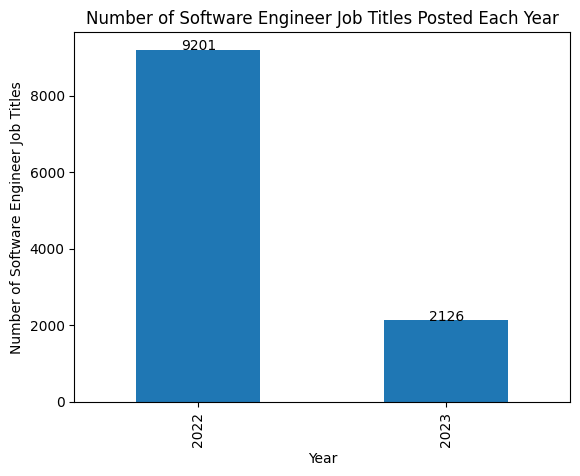

In [33]:
# Filter data for 'Software Engineer' job titles
software_engineer_df = df[df['Job Title'] == 'Software Engineer']

# Group by year and count the occurrences
software_engineer_counts = software_engineer_df.groupby(software_engineer_df['Job Posted Date'].dt.year).size()

# Plotting
ax = software_engineer_counts.plot.bar()

# Adding text labels on top of each bar
for i, count in enumerate(software_engineer_counts):
    ax.text(i, count + 0.1, str(count), ha='center')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Software Engineer Job Titles')
plt.title('Number of Software Engineer Job Titles Posted Each Year')

# Show plot
plt.show()


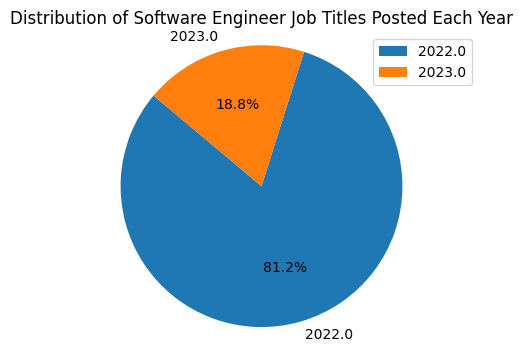

In [34]:
# Calculate the number of "Software Engineer" job titles posted each year
se_job_counts_by_year = df[df['Job Title'] == 'Software Engineer'].groupby(df['Job Posted Date'].dt.year).size()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(se_job_counts_by_year, labels=se_job_counts_by_year.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Software Engineer Job Titles Posted Each Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="upper right",bbox_to_anchor=(1.2, 1))
plt.show();


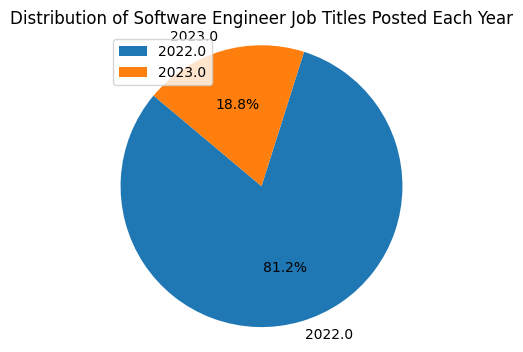

In [35]:
plt.figure(figsize=(4, 4))
pie_chart = plt.pie(se_job_counts_by_year, labels=se_job_counts_by_year.index, autopct='%1.1f%%', startangle=140)

# Add a legend
plt.legend(pie_chart[0], se_job_counts_by_year.index, loc="best")

plt.title('Distribution of Software Engineer Job Titles Posted Each Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In July 2022, major lay offs started in the tech industry. Let's see how the job posting were affected because of this.

In [36]:
se_2022=df[(df['Job Title']=='Software Engineer') & (df['Job Posted Date'].dt.year == 2022)]

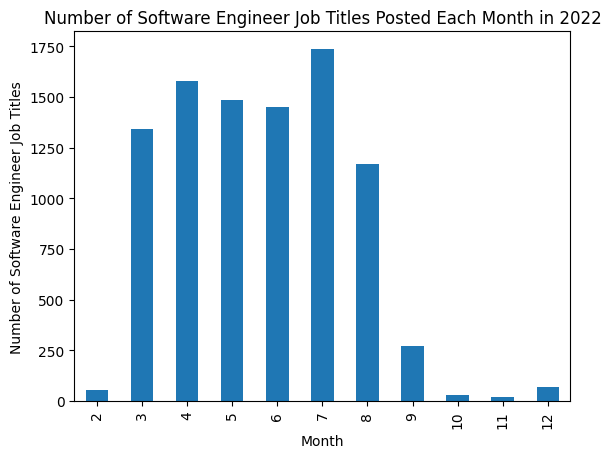

In [37]:
se_2022.groupby(se_2022['Job Posted Date'].dt.month).size().plot.bar()
plt.xlabel('Month')
plt.ylabel('Number of Software Engineer Job Titles')
plt.title('Number of Software Engineer Job Titles Posted Each Month in 2022');

2023

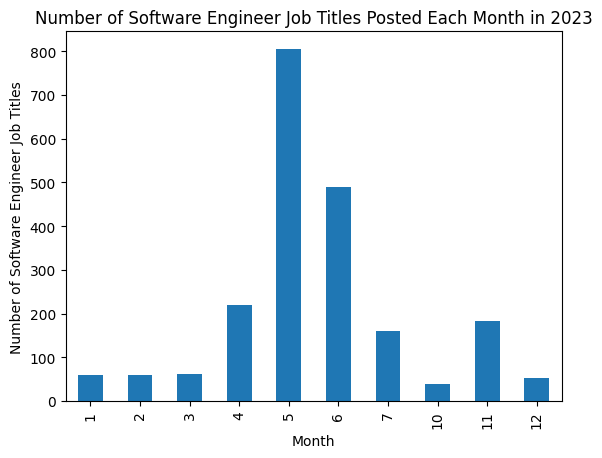

In [38]:
se_2023=df[(df['Job Title']=='Software Engineer') & (df['Job Posted Date'].dt.year == 2023)]
se_2023.groupby(se_2023['Job Posted Date'].dt.month).size().plot.bar()
plt.xlabel('Month')
plt.ylabel('Number of Software Engineer Job Titles')
plt.title('Number of Software Engineer Job Titles Posted Each Month in 2023');

In [39]:
df['Salary Estimate']

0              $87.9K - $111K a year
1               $101K - $128K a year
2         $120,000 - $130,000 a year
3               $45.8K - $58K a year
4                     $57,500 a year
                     ...            
328623    $108,900 - $166,980 a year
328631        $73.7K - $93.3K a year
328634       $47.48 - $68.00 an hour
328640      $60,000 - $72,000 a year
328641          $162K - $205K a year
Name: Salary Estimate, Length: 324759, dtype: object

We can see there are a few job posting with salary estimates per hour. Converting that to a year to keep it consistent.

In [40]:
def hourly_to_yearly(salary):
    if isinstance(salary, str) and 'an hour' in salary:
        # Extract hourly rate
        hourly_rate = float(salary.split('$')[1].split()[0].replace(',', ''))
        # Assuming 40 hours per week and 52 weeks per year
        yearly_salary = hourly_rate * 40 * 52
        # Format yearly salary string
        return f'${yearly_salary:,.0f} a year'
    else:
        return salary

In [41]:
df['Salary Estimate'] = df['Salary Estimate'].apply(hourly_to_yearly)

<ipython-input-41-c3ecb8f2925c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].apply(hourly_to_yearly)


In [42]:
print(df['Salary Estimate'])

0              $87.9K - $111K a year
1               $101K - $128K a year
2         $120,000 - $130,000 a year
3               $45.8K - $58K a year
4                     $57,500 a year
                     ...            
328623    $108,900 - $166,980 a year
328631        $73.7K - $93.3K a year
328634                $98,758 a year
328640      $60,000 - $72,000 a year
328641          $162K - $205K a year
Name: Salary Estimate, Length: 324759, dtype: object


In [43]:
se_2022['Salary Estimate'].head(10)

9025                           NaN
9028                           NaN
9032                           NaN
9078                           NaN
9112                           NaN
9141    $137,750 - $225,000 a year
9238                           NaN
9338     $90,000 - $111,000 a year
9364           From $85,000 a year
9444             $50 - $70 an hour
Name: Salary Estimate, dtype: object

In [44]:
df['Job Description']

0         \n \n  \n   \n    Video Player\n   \n   \n   \...
1         \n\n Job ID: 482409\n  Exempt\n \n  Oldcastle ...
2         \n Who We Are \n  We are creating the best way...
3         \n\n Who we are: ITRCC is dedicated to deliver...
4         SYSTEMS ADMINISTRATOR\nPosition requires the i...
                                ...                        
328623    Juniper's Software and Cross-BU Solutions team...
328631    Department: Office of Small Business Programs ...
328634    Howard County Conveniently located in the hear...
328640    Career Title : Data Systems and Donor Relation...
328641    There is a place for you at T. Rowe Price to g...
Name: Job Description, Length: 324759, dtype: object

In [45]:
# Convert the 'Job Description' column to lowercase for case-insensitive search
df['Job Description'] = df['Job Description'].str.lower()

# Count the occurrences of keywords in job descriptions
num_ai = df['Job Description'].str.contains(r'\bai\b|\bartificial intelligence\b|\bml\b|\bmachine learning\b|\bdata science\b').sum()

# Display the result
print("Number of job descriptions containing keywords like AI, ML, data science:", num_ai)


<ipython-input-45-a4b3bb282f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Description'] = df['Job Description'].str.lower()


Number of job descriptions containing keywords like AI, ML, data science: 47218


In [46]:
df_2022 = df[df['Job Posted Date'].dt.year == 2022]

# Convert the 'Job Description' column to lowercase for case-insensitive search
df_2022['Job Description'] = df_2022['Job Description'].str.lower()

# Count the occurrences of keywords in job descriptions
num_ai_2022 = df_2022['Job Description'].str.contains(r'\bai\b|\bartificial intelligence\b|\bml\b|\bmachine learning\b|\bdata science\b').sum()

# Display the result
print("Number of job descriptions containing keywords like AI, ML, data science posted in 2022:", num_ai_2022)

<ipython-input-46-048073c82d37>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Job Description'] = df_2022['Job Description'].str.lower()


Number of job descriptions containing keywords like AI, ML, data science posted in 2022: 33385


In [47]:
# Display the result
print("Number of job descriptions containing keywords like AI, ML, data science posted in 2022:", num_ai_2022)

Number of job descriptions containing keywords like AI, ML, data science posted in 2022: 33385


In [48]:
df_2023 = df[df['Job Posted Date'].dt.year == 2023]

# Convert the 'Job Description' column to lowercase for case-insensitive search
df_2023['Job Description'] = df_2023['Job Description'].str.lower()

# Count the occurrences of keywords in job descriptions
num_ai_2023 = df_2023['Job Description'].str.contains(r'\bai\b|\bartificial intelligence\b|\bml\b|\bmachine learning\b|\bdata science\b').sum()


<ipython-input-48-71c39d2f8d5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Job Description'] = df_2023['Job Description'].str.lower()


In [49]:
print("Number of job descriptions containing keywords like AI, ML, data science posted in 2023:", num_ai_2023)

Number of job descriptions containing keywords like AI, ML, data science posted in 2023: 13833


In [50]:
# Filter the DataFrame for rows posted in 2022
df_2022 = df[df['Job Posted Date'].dt.year == 2022]

# Convert the 'Job Description' column to lowercase for case-insensitive search
df_2022['Job Description'] = df_2022['Job Description'].str.lower()

# Filter rows with keywords in job descriptions
df_keywords = df_2022[df_2022['Job Description'].str.contains(r'\bai\b|\bartificial intelligence\b|\bml\b|\bmachine learning\b|\bdata science\b')]

# Count occurrences of each unique job title
job_title_counts = df_keywords['Job Title'].value_counts()

# Select the top 20 job titles
top_20_job_titles = job_title_counts.head(20)

# Display the top 20 job titles
print("Top 20 job titles with job descriptions containing keywords like AI, ML, data science posted in 2022:")
print(top_20_job_titles)


<ipython-input-50-db315f5196e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Job Description'] = df_2022['Job Description'].str.lower()


Top 20 job titles with job descriptions containing keywords like AI, ML, data science posted in 2022:
Job Title
Software Engineer                        1197
Data Analyst                             1182
Data Engineer                            1056
Senior Software Engineer                  793
Machine Learning Engineer                 455
Senior Data Engineer                      386
Senior Data Analyst (REMOTE)              382
Software Developer                        300
Senior Data Analyst                       297
Business Intelligence Analyst             268
Lead Software Engineer                    184
Principal Software Engineer               184
Full Stack Developer                      178
Software Engineer II                      171
Network Engineer                          168
Senior Machine Learning Engineer          150
Sr. Software Engineer                     127
Technical Writer                          121
Full-Stack Software Engineer (Elixir)     115
Database Admin

In [51]:
df['Company Name'].value_counts().head(10)

Company Name
Change Healthcare            5228
JPMorgan Chase Bank, N.A.    5210
Deloitte                     3075
CyberCoders                  3043
Recruiting From Scratch      2596
Indeed                       2522
Apple                        1725
Pearson                      1654
Ad Hoc Team                  1613
WELLS FARGO BANK             1377
Name: count, dtype: int64

In [52]:
df_2022 = df[df['Job Posted Date'].dt.year == 2022]


In [53]:
df['Job Title'].value_counts()

Job Title
Software Engineer                                                                                      11327
Senior Software Engineer                                                                                7814
Data Analyst                                                                                            7808
Network Engineer                                                                                        5324
Software Developer                                                                                      5030
                                                                                                       ...  
IT Specialist (Enterprise Architecture), GS-2210-15 Chief Technology Architect (CTA)                       1
IT Specialist InfoSec - Tableau/Database Administrator PD 20R062 Office of Information Technology          1
Principle Systems Administrator - Must have secret clearance, Woburn MA!                                   1
Systems A

In [54]:
df = df.dropna(subset=['Job Title'])

# Define a list of tech-related keywords
tech_keywords = ['engineer', 'scientist', 'architect', 'analyst','systems','Machine','Network','IT']

# Filter the DataFrame for job titles not containing any of the tech-related keywords
non_tech_jobs = df[~df['Job Title'].str.lower().str.contains('|'.join(tech_keywords))]

# Display the non-tech-related job titles
print(non_tech_jobs['Job Title'].unique())


['IT Auditor' 'IT Project Manager' 'IT Project Manager (Remote)' ...
 'Temporary Data Entry Clerk (REMOTE)-US'
 'Manager - Software Product Marketing'
 'Chief Data Privacy Officer (Technical Services Manager II) - Technology and Communications Services']


In [55]:
df['Job Title'].isna().sum()

0

In [56]:
df['Job Type'].value_counts()

Job Type
Full-time                                            128541
Contract                                               7425
Full-time, Contract                                    5150
Full-time, Remote                                      2743
Remote                                                 1266
                                                      ...  
Temporary, Temp-to-hire, Remote                           1
Part-time, Temporary, Internship                          1
Contract, Permanent                                       1
Full-time, Temporary, Contract, Permanent, Remote         1
PRN, Per diem                                             1
Name: count, Length: 101, dtype: int64

In [57]:
# Define a list of tech-related keywords
tech_keywords = ['engineer', 'scientist', 'architect', 'analyst', 'systems', 'machine', 'network', 'it','software','application','data']

# Modify the regular expression pattern to include word boundaries
pattern = r'\b(?:{})\b'.format('|'.join(tech_keywords))

# Filter the DataFrame for job titles not containing any of the tech-related keywords
non_tech_jobs = df[~df['Job Title'].str.lower().str.contains(pattern)]

# Display the non-tech-related job titles
print(non_tech_jobs['Job Title'].unique())


['REMOTE Senior Database Administrator'
 'Cybersecurity Technical Writer (Remote)' 'Technical Writer- Remote' ...
 'Cloud Intern, Dev Ops (Summer 24)'
 'Project Management Intern - Office of the Chief Technology Officer'
 'Service Delivery Lead Private Cloud +']


In [58]:

non_tech_keywords = ['video','editor', 'writer', 'artist', 'manager', 'coordinator']

# Filter the DataFrame for job titles containing any of the non-tech-related keywords
non_tech_jobs = df[df['Job Title'].str.lower().str.contains('|'.join(non_tech_keywords))]

# Display the non-tech-related job titles
print(non_tech_jobs['Job Title'].unique())



['IT Project Manager' 'IT Project Manager (Remote)'
 'Jr. Network Engineer Associate Manager' ...
 'Media & Entertainment Manager, Director, & Senior Director – Tech and Data Design'
 'Manager - Software Product Marketing'
 'Chief Data Privacy Officer (Technical Services Manager II) - Technology and Communications Services']


In [59]:
df['Company Rating'].value_counts()

Company Rating
3.9    26579
3.7    23958
4.0    23443
3.8    22936
3.6    18707
3.5    16568
3.4    13662
4.1    13051
3.0    10571
3.3    10451
4.3     9618
4.2     9146
3.2     8320
3.1     5146
5.0     4797
4.5     3176
2.9     2959
4.4     2606
2.8     2576
2.7     2282
2.4     1642
2.5     1536
4.8     1356
2.6     1355
4.7     1270
4.6     1125
4.9      861
2.3      545
2.0      428
2.2      401
1.3      204
1.7      195
1.5      194
1.0      170
2.1      142
1.8       79
1.9       46
1.6       40
1.4       24
1.2        4
Name: count, dtype: int64

In [60]:
df[df['Company Rating']==df['Company Rating'].max()]['Company Name'].unique()

array(['MTA Inc', 'Revvity', '6sense', 'Bowman Williams',
       'Caribou Thunder', 'Now IT Works', 'Ad Hoc Team', 'Kalles Group',
       'Calvert Systems Engineering Inc', 'Mainspring Energy', 'iLocatum',
       'Excel Engineering Inc', 'Maveris', 'Payer Matrix', 'ProFocus',
       'Sandoval Technology Solutions LLC', 'Clarity Innovations',
       'Swingtech', 'Phoenix Operations Group', 'Cognitio', 'Infinitek',
       'Defense Acquisition Support Services LLC', 'HealthVerity',
       'Charles IT', 'Stellar Science', 'Lynk', 'TechSource, Inc.', 'ZSG',
       'Abile Group, Inc.', 'Affinity.co', 'Engtal', 'GCyber', 'SIXGEN',
       'GaN', 'Detroit Labs', 'Alpine Solutions Group', 'TheMasonGroup',
       'FORTUNE PERSONNEL CONSULTANTS',
       'Vermont Energy Investment Corporation',
       'Solidus Technical Solutions', 'AcreTrader Inc',
       'Saddle Rock Legal Group', 'Contentful',
       'Twinn Intelligence Group', 'Potomac Management', 'The Tech Group',
       'GRAIL', 'HumanIT Sol

In [61]:
best_rated_company=df[df['Company Rating']==5]['Company Name'].value_counts().head(1)

In [62]:
best_rated_company = df[df['Company Rating'] == 5]['Company Name'].value_counts().idxmax()

# Filter the DataFrame for rows belonging to the best-rated company
best_rated_company_jobs = df[(df['Company Name'] == best_rated_company) ]

# Display the job types posted by the best-rated company
print(best_rated_company_jobs['Job Title'].value_counts().head(10))

Job Title
Software Engineer III Back End (remote)                           119
Senior Software Engineer DevOps (remote)                          104
Senior Software Engineer Back End (remote)                        104
Staff Software Engineer Architecture (remote)                      88
Software Engineer III, Back End (remote)                           79
Managing Software Engineer DevOps (remote)                         72
Staff Software Engineer DevOps (remote)                            68
Senior Software Engineer Full Stack, Back End - Python(remote)     61
Staff Software Engineer Full Stack w/Back End                      58
Senior Software Engineer Full Stack w/Back End (remote)            58
Name: count, dtype: int64


BEST JOBS IN THE TOP RATED COMPANY IN 2023.

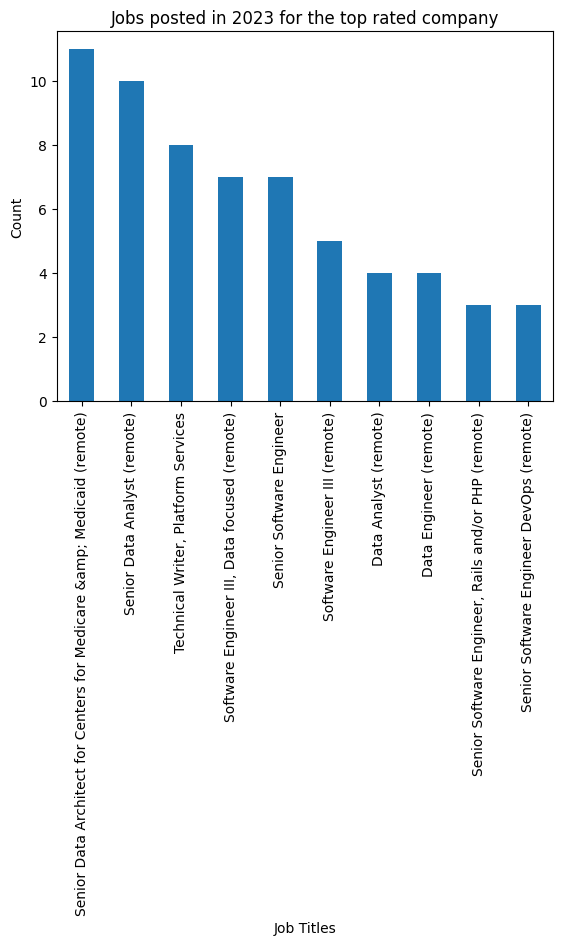

In [63]:
best_rated_company_jobs_2023 = df[(df['Company Name'] == best_rated_company) & (df['Job Posted Date'].dt.year == 2023)]

best_rated_company_jobs_2023['Job Title'].value_counts().head(10).plot.bar()
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('Jobs posted in 2023 for the top rated company');

In [64]:
df[df['Company Name'] == 'Google']['Company Name'].value_counts()

Company Name
Google    470
Name: count, dtype: int64

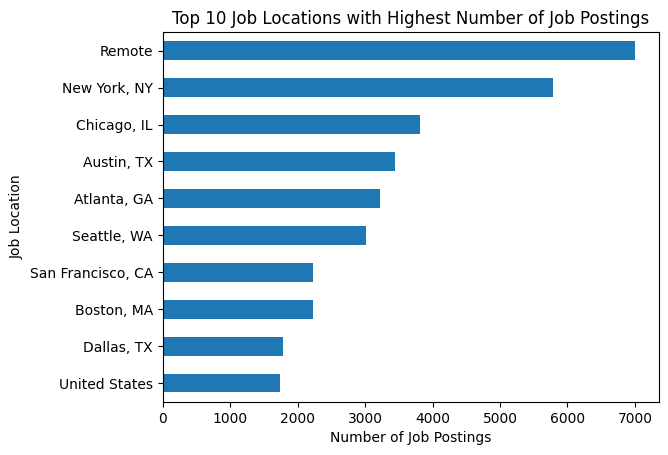

In [65]:
df['Job Location'].value_counts().head(10).plot.barh().invert_yaxis()
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Location')
plt.title('Top 10 Job Locations with Highest Number of Job Postings');

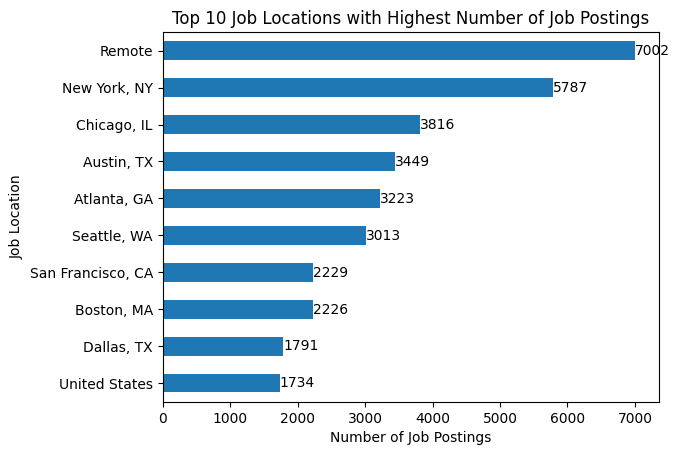

In [66]:
# Get the top 10 job locations and their counts
top_job_locations = df['Job Location'].value_counts().head(10)

# Plotting
ax = top_job_locations.plot.barh()
ax.invert_yaxis()  # Invert y-axis to have the highest count at the top

# Add text labels on the bars
for i, (location, count) in enumerate(zip(top_job_locations.index, top_job_locations.values)):
    plt.text(count, i, str(count), ha='left', va='center', color='black')

# Adding labels and title
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Location')
plt.title('Top 10 Job Locations with Highest Number of Job Postings')

# Show plot
plt.show()


In [67]:
(df['Job Location']=='San Jose, CA').value_counts()

Job Location
False    323992
True        708
Name: count, dtype: int64

In [68]:
ca_locations = df[df['Job Location'].str.contains('CA', na=False)]['Job Location'].unique()

# Display CA locations
print(ca_locations)


['San Diego, CA 92121' 'Irvine, CA' 'Sunnyvale, CA' ...
 'Stockton, CA 95202' 'San Dimas, CA' 'Corona, CA 92881']


In [69]:
# Total number of job postings containing 'CA' in their location
total_ca_jobs = len(df[df['Job Location'].str.contains('CA', na=False)])

print("Total number of job postings in locations containing 'CA':", total_ca_jobs)


Total number of job postings in locations containing 'CA': 27911


In [70]:
# List of cities or regions in the Bay Area
bay_area_locations = ['San Francisco', 'Oakland', 'San Jose', 'Palo Alto', 'Mountain View', 'Sunnyvale', 'Santa Clara', 'Berkeley', 'Fremont', 'San Mateo', 'Redwood City', 'Menlo Park', 'Cupertino', 'Milpitas', 'San Rafael', 'Hayward', 'San Leandro', 'Union City', 'Alameda', 'Emeryville', 'Burlingame', 'Daly City', 'South San Francisco', 'San Bruno', 'Foster City', 'Belmont', 'Los Altos', 'Los Gatos', 'Campbell', 'Pleasanton', 'Livermore', 'Dublin', 'San Ramon', 'Walnut Creek', 'Concord']

# Filter job locations in the Bay Area
bay_area_jobs = df[df['Job Location'].str.contains('|'.join(bay_area_locations), case=False, na=False)]

# Get unique Bay Area job locations
unique_bay_area_locations = bay_area_jobs['Job Location'].unique()

# Display unique Bay Area job locations
print(unique_bay_area_locations)


['Sunnyvale, CA' 'San Jose, CA 95134' 'San Jose, CA'
 'Santa Clara, CA 95050' 'Santa Clara, CA 95054' 'Foster City, CA'
 'San Francisco, CA 94103' 'Mountain View, CA' 'San Francisco, CA'
 'Fremont, CA 94536' 'Burlingame, CA 94010' 'San Jose, CA 95110'
 'Milpitas, CA 95035' 'Santa Clara, CA' 'Oakland, CA'
 'Menlo Park, CA 94025' 'San Francisco, CA 94102' 'Cupertino, CA'
 'San Mateo, CA 94401' 'Mountain View, CA 94043' 'Emeryville, CA'
 'Concord, NH 03301' 'Berkeley Heights, NJ' 'Palo Alto, CA'
 'Sunnyvale, CA 94089' 'Fremont, CA 94538' 'San Mateo, CA'
 'Palo Alto, CA 94304' 'San Francisco, CA 94105' 'San Mateo, CA 94404'
 'Berkeley, MO' 'Foster City, CA 94404' 'San Ramon, CA'
 'Concord, CA 94520' 'Berkeley Heights, NJ 07922'
 'San Francisco, CA 94143' 'Mountain View, CA 94039' 'Concord, NC 28025'
 'Dublin, OH 43017' 'Pleasanton, CA' 'San Francisco, CA 94133'
 'Cupertino, CA 95014' 'San Francisco, CA 94107' 'Berkeley, CA 94704'
 'Oakland, CA 94617' 'Sunnyvale, CA 94086' 'San Francisco Ba

In [71]:
# Total number of job postings in the Bay Area
total_bay_area_jobs = len(bay_area_jobs)

print("Total number of job postings in the Bay Area:", total_bay_area_jobs)


Total number of job postings in the Bay Area: 14182


In [72]:
df[(df['Job Location']=='Remote')&(df['Company Rating']>4)]['Company Name'].value_counts().head(10)

Company Name
Meta                   58
X by 2                 25
Pinterest              23
Intone Networks        17
Splunk                 16
Aquent Talent          16
Engtal                 16
Coinbase               15
GAMA-1 Technologies    14
INTEL                  13
Name: count, dtype: int64

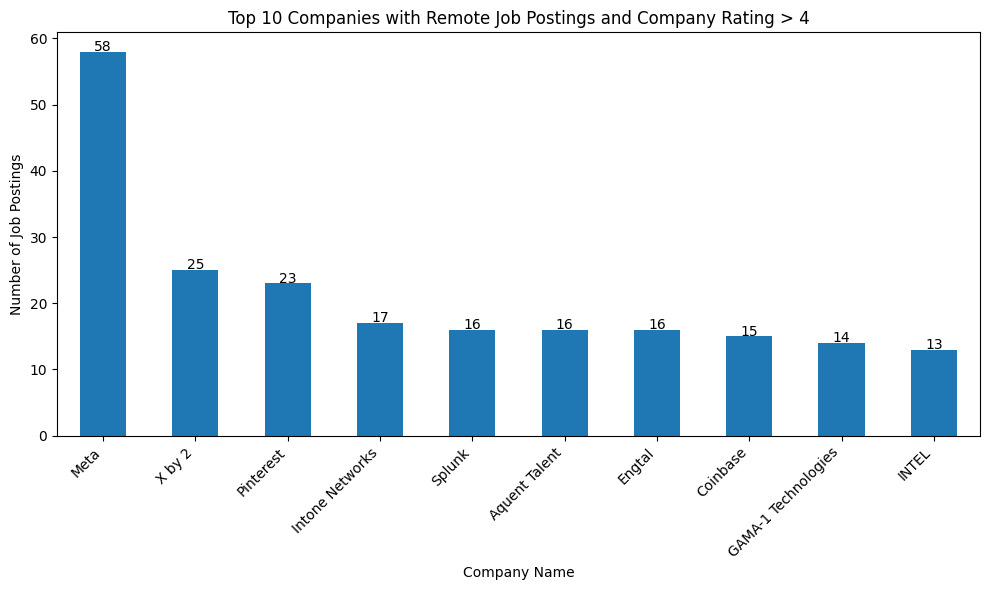

In [73]:
remote_high_rated_companies = df[(df['Job Location'] == 'Remote') & (df['Company Rating'] > 4)]

top_remote_companies = remote_high_rated_companies['Company Name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
ax = top_remote_companies.plot(kind='bar')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Companies with Remote Job Postings and Company Rating > 4')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add text labels on top of each bar
for i, count in enumerate(top_remote_companies):
    plt.text(i, count + 0.1, str(count), ha='center')

# Show plot
plt.show()


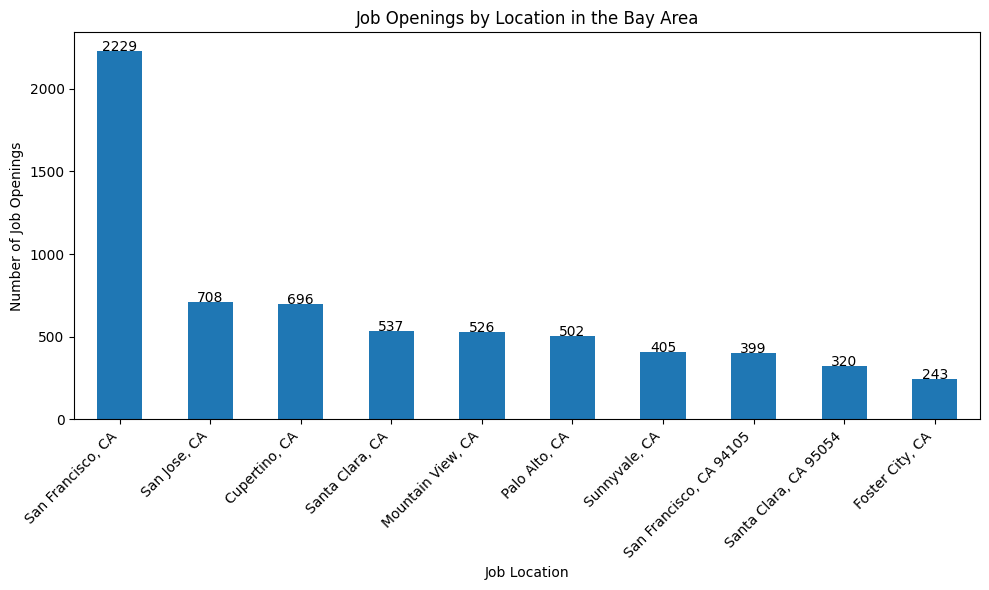

In [74]:
bay_area_jobs = df[df['Job Location'].str.contains('|'.join(bay_area_locations), case=False, na=False)]

# Count the number of job openings for each location in the Bay Area
job_openings_by_location = bay_area_jobs['Job Location'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
ax = job_openings_by_location.plot(kind='bar')

# Add text labels on top of each bar
for i, count in enumerate(job_openings_by_location):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xlabel('Job Location')
plt.ylabel('Number of Job Openings')
plt.title('Job Openings by Location in the Bay Area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


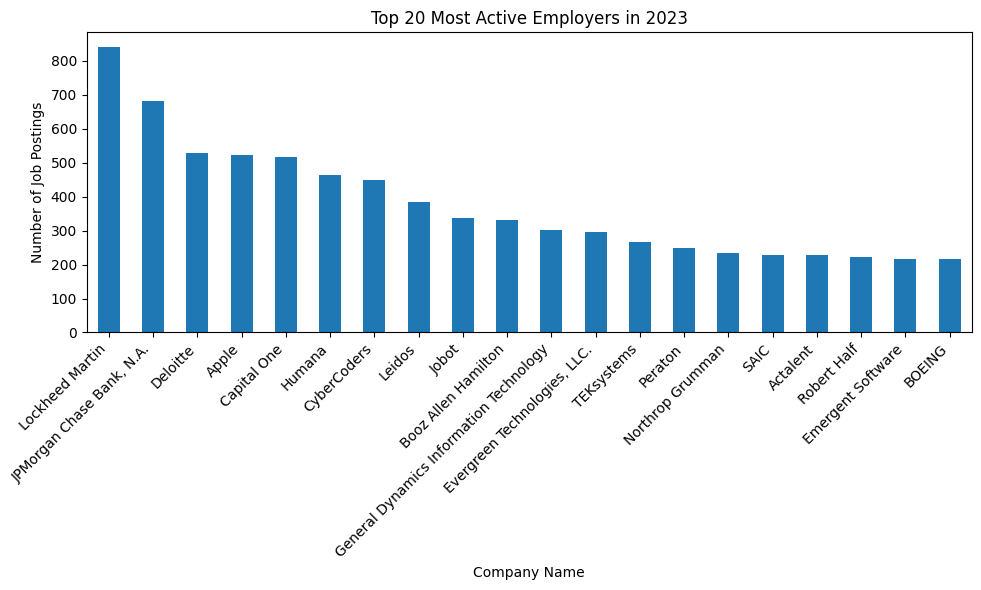

In [75]:
df_2023 = df[df['Job Posted Date'].dt.year == 2023]

# Count the occurrences of each unique company name
top_20_employers_2023 = df_2023['Company Name'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_20_employers_2023.plot(kind='bar')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.title('Top 20 Most Active Employers in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

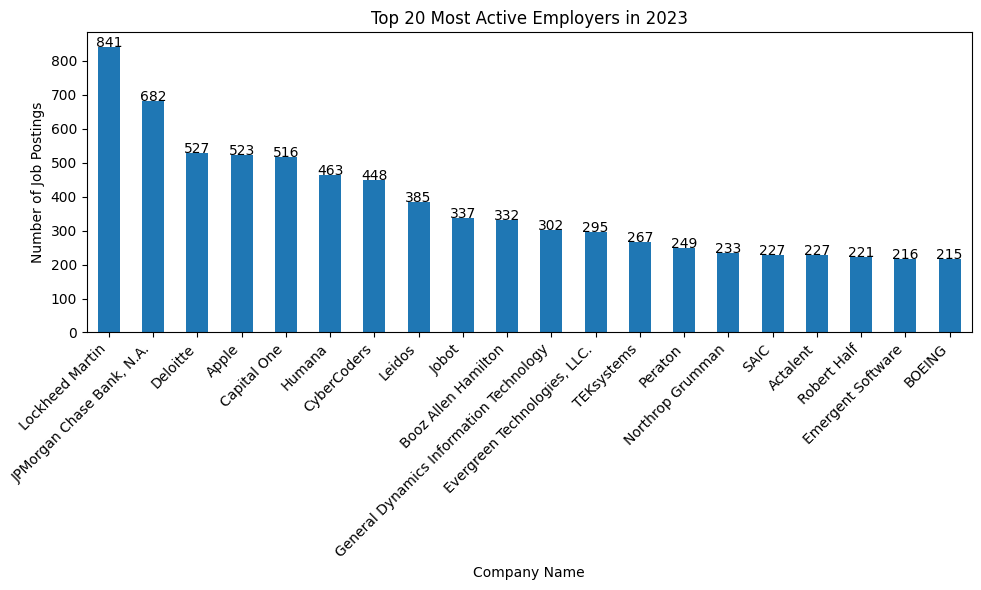

In [76]:
top_20_employers_2023 = df_2023['Company Name'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = top_20_employers_2023.plot(kind='bar')

# Add text labels on top of each bar
for i, count in enumerate(top_20_employers_2023):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.title('Top 20 Most Active Employers in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

How has the job market changed after ChatGPT?

What were the job titles in top 10 employers in 2022 vs in 2023?

In [77]:
df_2022 = df[df['Job Posted Date'].dt.year == 2022]

# Count the occurrences of each unique job title
top_10_job_titles_2022 = df_2022['Job Title'].value_counts().head(10)

# Display the top 10 job titles in 2022
print(top_10_job_titles_2022)

Job Title
Software Engineer           9201
Senior Software Engineer    6201
Data Analyst                5335
Software Developer          4102
Network Engineer            3978
Systems Administrator       3365
IT Support Specialist       2718
Data Engineer               2478
Technical Writer            2311
Full Stack Developer        1975
Name: count, dtype: int64


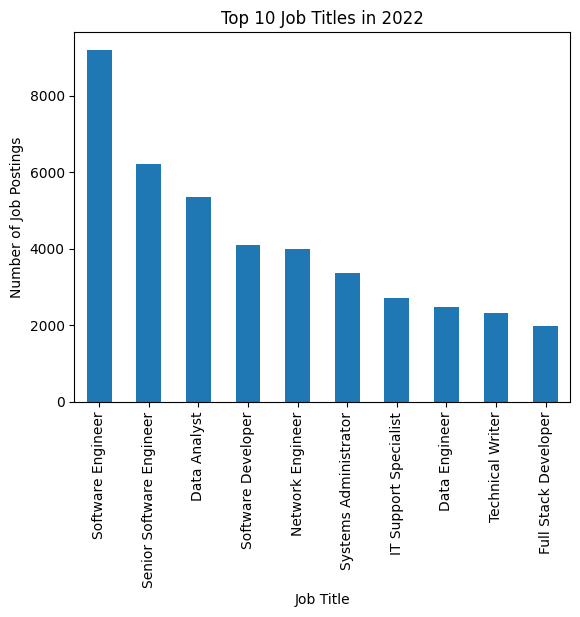

In [78]:
df_2022['Job Title'].value_counts().head(10).plot.bar()
plt.xlabel('Job Title')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Job Titles in 2022');

In [79]:
df_2023 = df[df['Job Posted Date'].dt.year == 2023]

# Count the occurrences of each unique job title
top_10_job_titles_2023 = df_2023['Job Title'].value_counts().head(10)

# Display the top 10 job titles in 2022
print(top_10_job_titles_2023)

Job Title
Data Analyst                2473
Software Engineer           2126
Senior Software Engineer    1613
Network Engineer            1346
Data Engineer               1345
Systems Administrator       1139
IT Support Specialist       1118
Software Developer           928
Technical Writer             840
Full Stack Developer         707
Name: count, dtype: int64


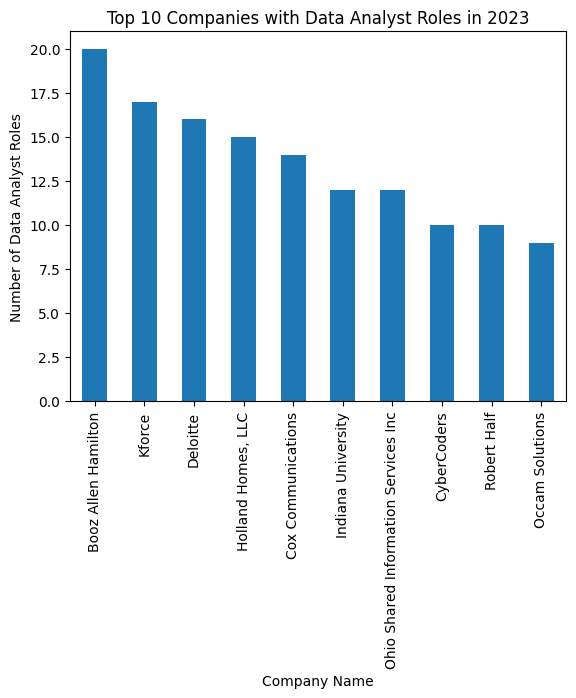

In [80]:
df_2023[df_2023['Job Title']=='Data Analyst']['Company Name'].value_counts().head(10).plot.bar()
plt.xlabel('Company Name')
plt.ylabel('Number of Data Analyst Roles')
plt.title('Top 10 Companies with Data Analyst Roles in 2023');

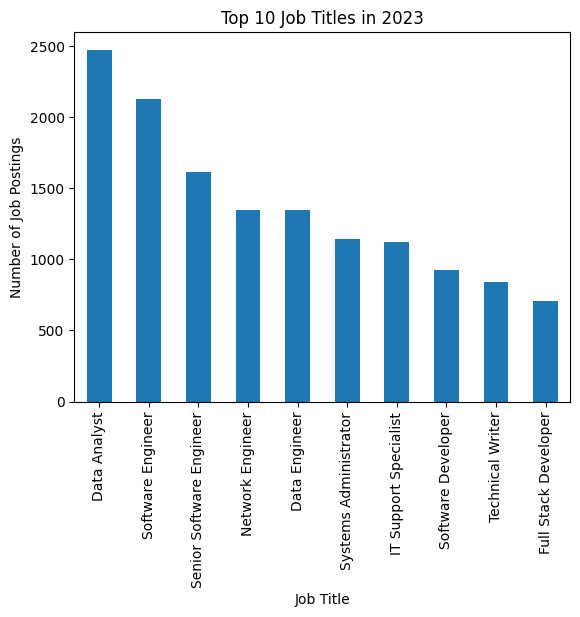

In [81]:
df_2023['Job Title'].value_counts().head(10).plot.bar()
plt.xlabel('Job Title')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Job Titles in 2023');

In [82]:
total_data_analyst_roles = len(df_2022[(df_2022['Company Name'] == 'Microsoft') & (df_2022['Job Title'] == 'Data Analyst')])
print("Total Data Analyst roles posted by Microsoft in 2022:", total_data_analyst_roles)


Total Data Analyst roles posted by Microsoft in 2022: 1


In [83]:
total_data_analyst_roles = len(df_2023[(df_2023['Company Name'] == 'Microsoft') & (df_2023['Job Title'] == 'Data Analyst')])
print("Total Data Analyst roles posted by Microsoft in 2023:", total_data_analyst_roles)

Total Data Analyst roles posted by Microsoft in 2023: 0


In [84]:
df_2023[df['Company Name']=='Microsoft']['Job Title'].value_counts().head(10)

<ipython-input-84-7f224dbd351c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023[df['Company Name']=='Microsoft']['Job Title'].value_counts().head(10)


Job Title
Software Engineer II                      25
Principal Software Engineer               22
Senior Software Engineer                  22
Software Engineer                         18
Software Engineer - CTJ - Poly             4
Principal Software Engineering Manager     4
Data Center IT Operations Manager          3
Senior Cloud Network Engineer              3
Senior Software Engineering Manager        2
Software Engineer II - CTJ - Poly          2
Name: count, dtype: int64

In [85]:
df_2022[df['Company Name']=='Google']['Job Title'].value_counts().sum()

<ipython-input-85-9ea6c0239965>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2022[df['Company Name']=='Google']['Job Title'].value_counts().sum()


274

In [86]:
df_2023[df['Company Name']=='Google']['Job Title'].value_counts().sum()

<ipython-input-86-ebc918ca7d3b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023[df['Company Name']=='Google']['Job Title'].value_counts().sum()


196

How direct competitors were affected.

Top 20 most hiring companies in 2022 versus 2023
Top 3 roles in each of the top 20 companies in 2022 versus 2023
How did job roles change for MS and MS competitors

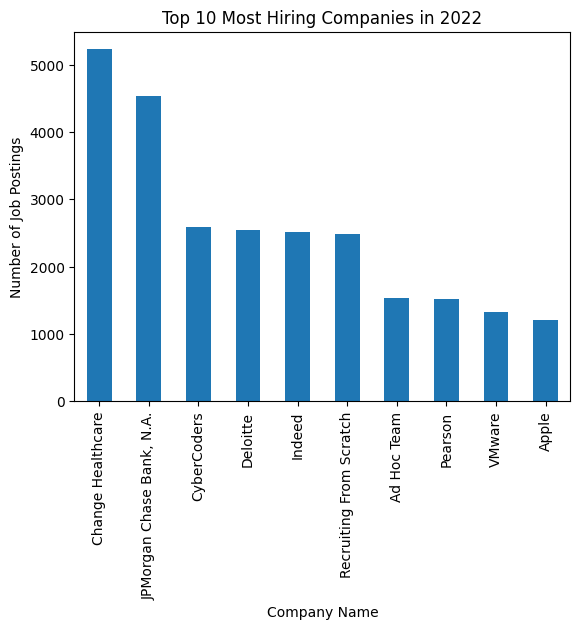

In [87]:
df_2022['Company Name'].value_counts().head(10).plot.bar()
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Most Hiring Companies in 2022');

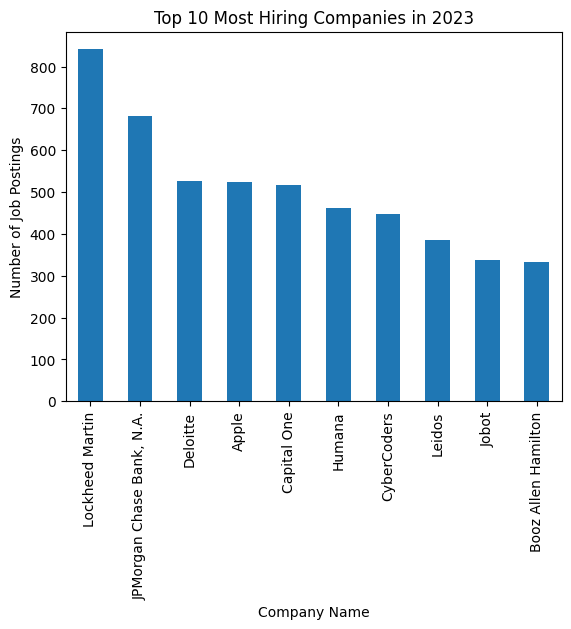

In [88]:
df_2023['Company Name'].value_counts().head(10).plot.bar()
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Most Hiring Companies in 2023');

In [89]:
df_2022[df_2022['Company Name']=='Change Healthcare']['Job Title'].value_counts()

Job Title
Senior Software Engineer                            393
Software Engineer                                   192
Software Engineer II                                179
Cloud Software Engineer                             123
Staff Software Engineer                             107
                                                   ... 
Sr. Director, Software Engineering                    1
Senior Cloud Engineer                                 1
Senior Full Stack Software Engineer - AWS Cloud       1
Sr Data Analyst                                       1
Software Engineering Manager - Dental Operations      1
Name: count, Length: 128, dtype: int64

In [90]:
df_2023[df_2023['Company Name'] == 'Change Healthcare']['Job Title'].value_counts()

Job Title
Senior Software Engineer (CRM)    1
Name: count, dtype: int64

In [91]:
df['Job Location'].value_counts()

Job Location
Remote                         7002
New York, NY                   5787
Chicago, IL                    3816
Austin, TX                     3449
Atlanta, GA                    3223
                               ... 
Ponte Vedra Beach, FL 32081       1
Reisterstown, MD 21136            1
Springfield, LA                   1
Lexington, KY 40536               1
Paxton, PA                        1
Name: count, Length: 15697, dtype: int64

In [92]:
# Assuming df_2022 and df_2023 are your DataFrames containing job postings data for 2022 and 2023, respectively

# Step 1: Calculate the top 20 most hiring companies for 2022 and 2023
top_10_companies_2022 = df_2022['Company Name'].value_counts().head(10)
top_10_companies_2023 = df_2023['Company Name'].value_counts().head(10)

# Step 2: For each of these top 20 companies, calculate the top 3 roles in 2022 and 2023
top_3_roles_2022 = {}
top_3_roles_2023 = {}

for company in top_10_companies_2022.index:
    top_roles = df_2022[df_2022['Company Name'] == company]['Job Title'].value_counts().head(3)
    top_3_roles_2022[company] = top_roles

for company in top_10_companies_2023.index:
    top_roles = df_2023[df_2023['Company Name'] == company]['Job Title'].value_counts().head(3)
    top_3_roles_2023[company] = top_roles

# Step 3: Display the results
print("Top 10 Most Hiring Companies in 2022:")
print(top_10_companies_2022)
print("\nTop 10 Most Hiring Companies in 2023:")
print(top_10_companies_2023)

print("\nTop 3 Roles in Each of the Top 10 Companies in 2022:")
for company, roles in top_3_roles_2022.items():
    print(f"\nCompany: {company}")
    print(roles)

print("\nTop 3 Roles in Each of the Top 10 Companies in 2023:")
for company, roles in top_3_roles_2023.items():
    print(f"\nCompany: {company}")
    print(roles)


Top 10 Most Hiring Companies in 2022:
Company Name
Change Healthcare            5227
JPMorgan Chase Bank, N.A.    4528
CyberCoders                  2595
Deloitte                     2548
Indeed                       2518
Recruiting From Scratch      2483
Ad Hoc Team                  1539
Pearson                      1515
VMware                       1332
Apple                        1202
Name: count, dtype: int64

Top 10 Most Hiring Companies in 2023:
Company Name
Lockheed Martin              841
JPMorgan Chase Bank, N.A.    682
Deloitte                     527
Apple                        523
Capital One                  516
Humana                       463
CyberCoders                  448
Leidos                       385
Jobot                        337
Booz Allen Hamilton          332
Name: count, dtype: int64

Top 3 Roles in Each of the Top 10 Companies in 2022:

Company: Change Healthcare
Job Title
Senior Software Engineer    393
Software Engineer           192
Software Engineer I

In [93]:
df['Salary Estimate']

0              $87.9K - $111K a year
1               $101K - $128K a year
2         $120,000 - $130,000 a year
3               $45.8K - $58K a year
4                     $57,500 a year
                     ...            
328623    $108,900 - $166,980 a year
328631        $73.7K - $93.3K a year
328634                $98,758 a year
328640      $60,000 - $72,000 a year
328641          $162K - $205K a year
Name: Salary Estimate, Length: 324700, dtype: object

In [94]:
top_3_companies_2022 = df_2022['Company Name'].value_counts().head(3)
top_3_roles_2022 = {}
for company in top_3_companies_2022.index:
    top_roles = df_2022[df_2022['Company Name'] == company]['Job Title'].value_counts().head(3)
    top_3_roles_2022[company] = top_roles

print("Top 3 Most Hiring Companies in 2022:")
print(top_3_companies_2022)

print("\nTop 3 Roles in Each of the Top 10 Companies in 2022:")
for company, roles in top_3_roles_2022.items():
    print(f"\nCompany: {company}")
    print(roles)

Top 3 Most Hiring Companies in 2022:
Company Name
Change Healthcare            5227
JPMorgan Chase Bank, N.A.    4528
CyberCoders                  2595
Name: count, dtype: int64

Top 3 Roles in Each of the Top 10 Companies in 2022:

Company: Change Healthcare
Job Title
Senior Software Engineer    393
Software Engineer           192
Software Engineer II        179
Name: count, dtype: int64

Company: JPMorgan Chase Bank, N.A.
Job Title
Software Engineering      256
Java Software Engineer    227
Software Engineer         177
Name: count, dtype: int64

Company: CyberCoders
Job Title
Software Engineer       193
Software Developer      172
Full Stack Developer     55
Name: count, dtype: int64


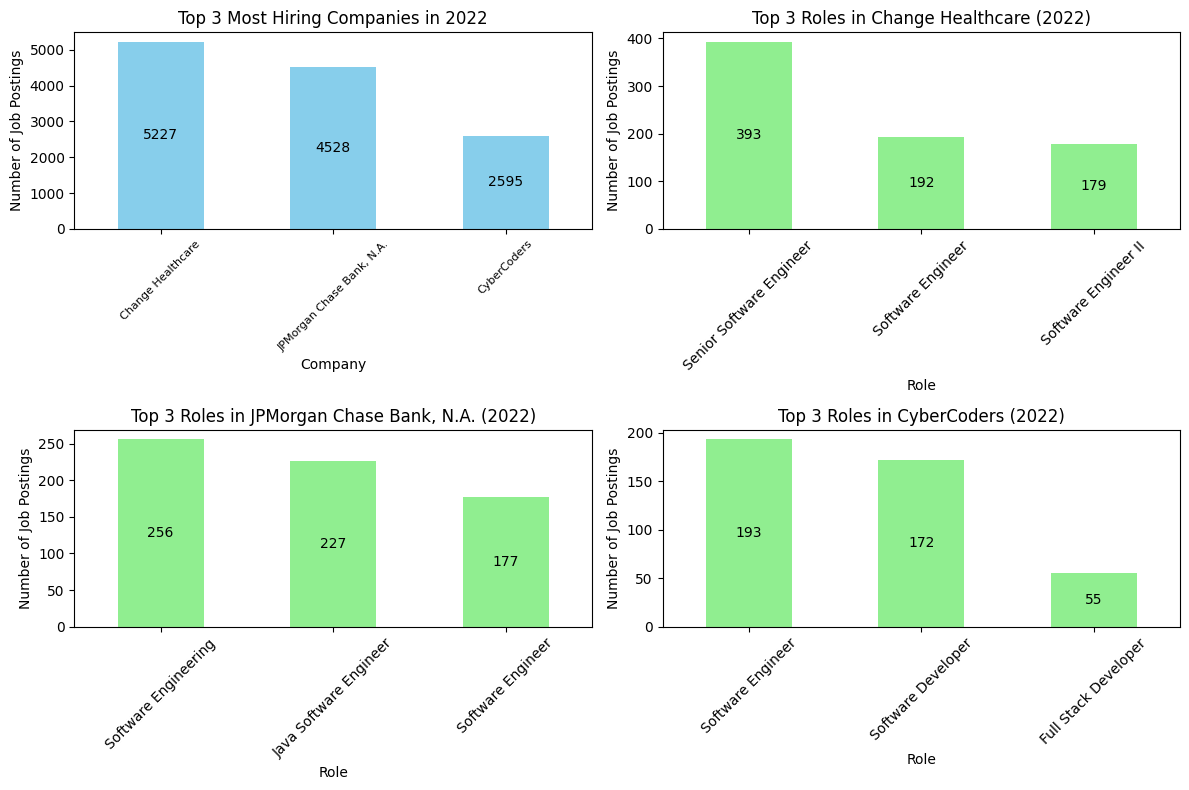

In [95]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot for top hiring companies
plt.subplot(2, 2, 1)
top_3_companies_2022.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Hiring Companies in 2022')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, fontsize=8)
for i, v in enumerate(top_3_companies_2022):
    plt.text(i, v / 2, str(v), ha='center', va='center', color='black')

# Plot for top roles in each company
for i, (company, roles) in enumerate(top_3_roles_2022.items(), start=1):
    plt.subplot(2, 2, i+1)
    roles.plot(kind='bar', color='lightgreen')
    plt.title(f'Top 3 Roles in {company} (2022)')
    plt.xlabel('Role')
    plt.ylabel('Number of Job Postings')
    plt.xticks(rotation=45)
    for i, v in enumerate(roles):
        plt.text(i, v / 2, str(v), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()





In [96]:
top_3_companies_2023 = df_2023['Company Name'].value_counts().head(3)
top_3_roles_2023 = {}
for company in top_3_companies_2023.index:
    top_roles = df_2023[df_2023['Company Name'] == company]['Job Title'].value_counts().head(3)
    top_3_roles_2023[company] = top_roles

print("Top 3 Most Hiring Companies in 2023:")
print(top_3_companies_2023)

print("\nTop 3 Roles in Each of the Top 10 Companies in 2023:")
for company, roles in top_3_roles_2023.items():
    print(f"\nCompany: {company}")
    print(roles)


Top 3 Most Hiring Companies in 2023:
Company Name
Lockheed Martin              841
JPMorgan Chase Bank, N.A.    682
Deloitte                     527
Name: count, dtype: int64

Top 3 Roles in Each of the Top 10 Companies in 2023:

Company: Lockheed Martin
Job Title
Software Engineer                   29
Software Engineer - Early Career    18
Technical Writer                    17
Name: count, dtype: int64

Company: JPMorgan Chase Bank, N.A.
Job Title
Software Engineer             38
Java Software Engineer III    26
Lead Software Engineer        16
Name: count, dtype: int64

Company: Deloitte
Job Title
Cloud Data Engineer - Healthcare                                      36
Cloud Security Engineer - AWS/Azure/GCP (Remote - Delivery Center)    36
Data Protection Manager                                               27
Name: count, dtype: int64


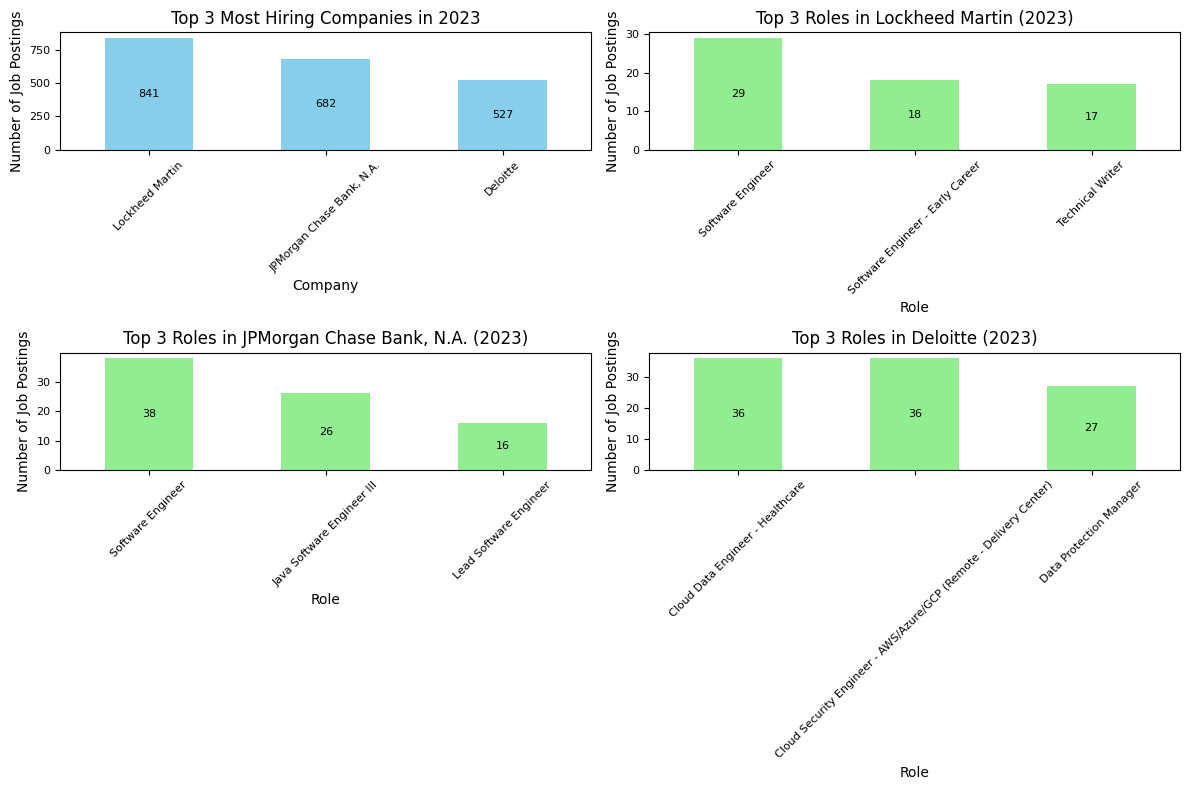

In [97]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot for top hiring companies
plt.subplot(2, 2, 1)
top_3_companies_2023.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Hiring Companies in 2023')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
for i, v in enumerate(top_3_companies_2023):
    plt.text(i, v / 2, str(v), ha='center', va='center', color='black', fontsize=8)

# Plot for top roles in each company
for i, (company, roles) in enumerate(top_3_roles_2023.items(), start=1):
    plt.subplot(2, 2, i+1)
    roles.plot(kind='bar', color='lightgreen')
    plt.title(f'Top 3 Roles in {company} (2023)')
    plt.xlabel('Role')
    plt.ylabel('Number of Job Postings')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    for i, v in enumerate(roles):
        plt.text(i, v / 2, str(v), ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()



In [98]:
# Assuming df is your DataFrame containing job postings data

# Step 1: Filter the DataFrame for Software Engineer roles in 2022
se_2022 = df[(df['Job Title'] == 'Software Engineer') & (df['Job Posted Date'].dt.year == 2022)]

# Step 2: Remove rows with missing salary estimates
se_2022 = se_2022.dropna(subset=['Salary Estimate'])

# Step 3: Extract numerical values from the salary estimates using regular expressions
se_2022['Salary Estimate'] = se_2022['Salary Estimate'].apply(lambda x: re.findall(r'\d+', x))
se_2022['Average Salary'] = se_2022['Salary Estimate'].apply(lambda x: sum(map(int, x)) / len(x) if x else 0)

# Calculate the average salary
average_salary_2022 = se_2022['Average Salary'].mean()



In [99]:
# Round off the average salary to two significant figures
rounded_average_salary_2022 = round(average_salary_2022)

# Print the rounded average salary
print("Average salary of Software Engineer roles in 2022 (rounded to 2 significant figures): $", rounded_average_salary_2022,"K")

Average salary of Software Engineer roles in 2022 (rounded to 2 significant figures): $ 145 K


In [100]:
# Step 1: Filter the DataFrame for Software Engineer roles in 2022
se_2023 = df[(df['Job Title'] == 'Software Engineer') & (df['Job Posted Date'].dt.year == 2023)]

# Step 2: Remove rows with missing salary estimates
se_2023 = se_2023.dropna(subset=['Salary Estimate'])

# Step 3: Extract numerical values from the salary estimates using regular expressions
se_2023['Salary Estimate'] = se_2023['Salary Estimate'].apply(lambda x: re.findall(r'\d+', x))
se_2023['Average Salary'] = se_2023['Salary Estimate'].apply(lambda x: sum(map(int, x)) / len(x) if x else 0)

# Calculate the average salary
average_salary_2023 = se_2023['Average Salary'].mean()

In [101]:
# Assuming average_salary_2023 contains the average salary for SE roles in 2023

# Round off the average salary to two significant figures
rounded_average_salary_2023 = round(average_salary_2023)

# Print the rounded average salary
print("Average salary of Software Engineer roles in 2023 (rounded to 2 significant figures): $", rounded_average_salary_2023,"K")


Average salary of Software Engineer roles in 2023 (rounded to 2 significant figures): $ 121 K


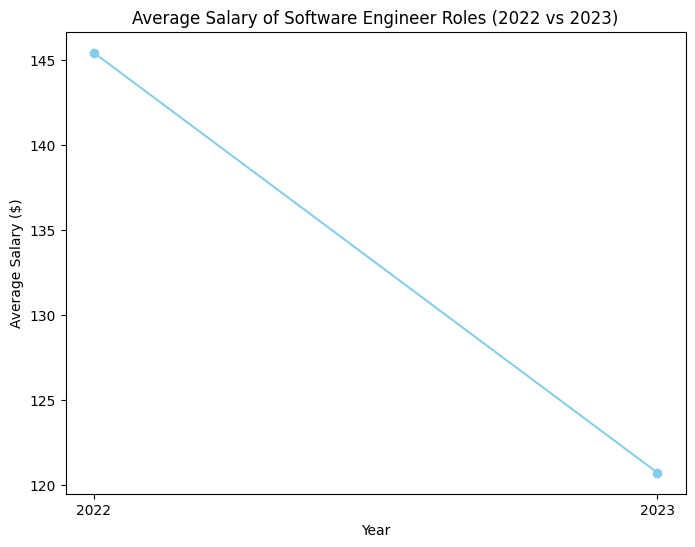

In [102]:


# Assuming average_salary_2023 contains the average salary for Software Engineer roles in 2023

import matplotlib.pyplot as plt

# Assuming average_salary_2022 and average_salary_2023 contain the average salaries for SE roles in 2022 and 2023 respectively

# Create a line plot
plt.figure(figsize=(8, 6))
years = ["2022", "2023"]
salaries = [average_salary_2022, average_salary_2023]
plt.plot(years, salaries, marker='o', color='skyblue', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary of Software Engineer Roles (2022 vs 2023)')

# Show plot
plt.show()



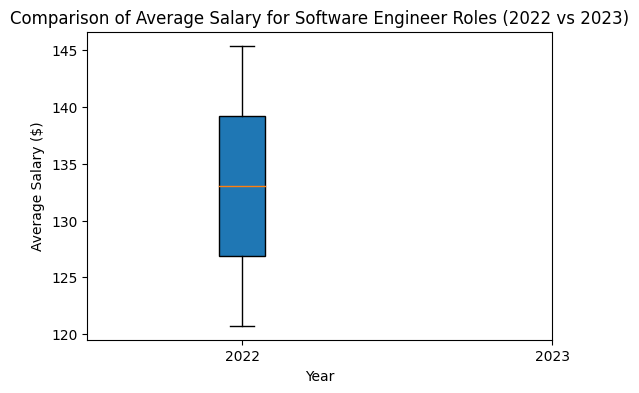

In [103]:
import matplotlib.pyplot as plt

# Assuming average_salary_2022 and average_salary_2023 contain the average salaries for SE roles in 2022 and 2023 respectively

# Data for box plot
data = [average_salary_2022, average_salary_2023]

# Create a box plot
plt.figure(figsize=(6, 4))  # Adjust figsize here
plt.boxplot(data, patch_artist=True)

# Add labels and title
plt.xticks([1, 2], ['2022', '2023'])
plt.xlabel('Year')
plt.ylabel('Average Salary ($)')
plt.title('Comparison of Average Salary for Software Engineer Roles (2022 vs 2023)')

# Show plot
plt.show()
